In [33]:
# import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


In [34]:
DATAPATH = 'dataset'

co2_data = pd.read_csv(os.path.join(DATAPATH,'CO2_mm_gl.csv'))
ch4_data = pd.read_csv(os.path.join(DATAPATH,'CH4_mm_gl.csv'))
n2o_data = pd.read_csv(os.path.join(DATAPATH,'N2O_mm_gl.csv'))
sf6_data = pd.read_csv(os.path.join(DATAPATH,'SF6_mm_gl.csv'))

In [35]:
co2_data.head(),ch4_data.head(),n2o_data.head() ,sf6_data.head()

(   year  month   decimal  average  average_unc   trend  trend_unc
 0  1979      1  1979.042   336.56         0.11  335.92       0.10
 1  1979      2  1979.125   337.29         0.09  336.26       0.10
 2  1979      3  1979.208   337.88         0.11  336.51       0.10
 3  1979      4  1979.292   338.32         0.13  336.72       0.11
 4  1979      5  1979.375   338.26         0.04  336.71       0.11,
    year  month   decimal  average  average_unc    trend  trend_unc
 0  1983      7  1983.542  1625.96         2.19  1635.15       1.42
 1  1983      8  1983.625  1628.05         2.72  1635.64       1.36
 2  1983      9  1983.708  1638.42         2.16  1636.19       1.29
 3  1983     10  1983.792  1644.81         1.40  1636.81       1.21
 4  1983     11  1983.875  1642.60         0.71  1637.49       1.12,
    year  month   decimal  average  average_unc   trend  trend_unc
 0  2001      1  2001.042   316.30         0.15  316.03       0.15
 1  2001      2  2001.125   316.31         0.17  316.0

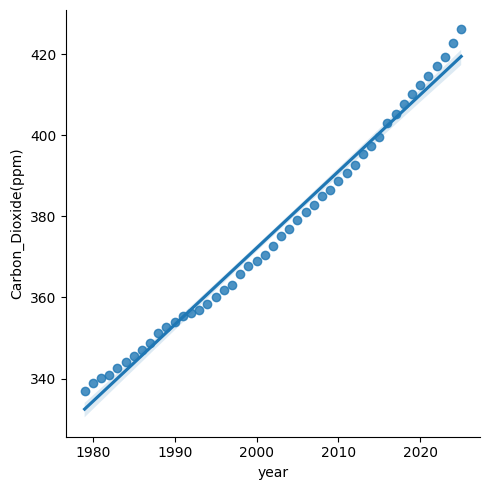

In [36]:
co2_years = co2_data['year'].unique()

co2_anual = pd.DataFrame()

for i in co2_years:
    df_avg = co2_data[co2_data['year'] == i]['average'].mean()
    df_new = (co2_data[co2_data['year'] == i].head(1))
    df_new['Carbon_Dioxide(ppm)'] = df_avg
    co2_anual = pd.concat([co2_anual, df_new], ignore_index=True)

sns.lmplot(x='year',y='Carbon_Dioxide(ppm)',data=co2_anual)

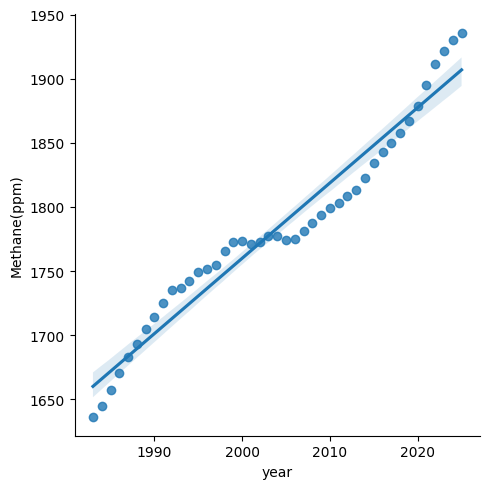

In [37]:
ch4_years = ch4_data['year'].unique()

ch4_anual = pd.DataFrame()

for i in ch4_years:
    df_avg = ch4_data[ch4_data['year'] == i]['average'].mean()
    df_new = (ch4_data[ch4_data['year'] == i].head(1))
    df_new['Methane(ppm)'] = df_avg
    ch4_anual = pd.concat([ch4_anual, df_new], ignore_index=True)

sns.lmplot(x='year',y='Methane(ppm)',data=ch4_anual)

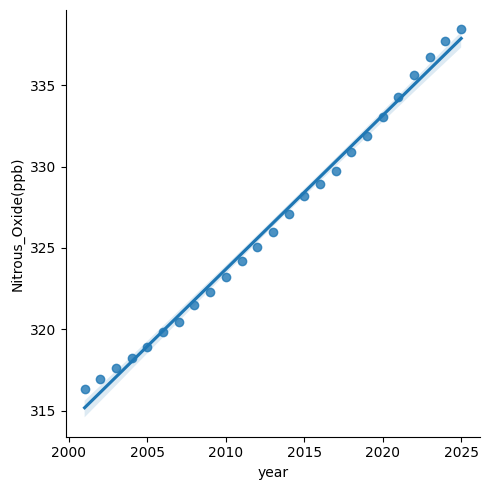

In [38]:
n2o_years = n2o_data['year'].unique()

n2o_anual = pd.DataFrame()

for i in n2o_years:
    df_avg = n2o_data[n2o_data['year'] == i]['average'].mean()
    df_new = (n2o_data[n2o_data['year'] == i].head(1))
    df_new['Nitrous_Oxide(ppb)'] = df_avg
    n2o_anual = pd.concat([n2o_anual, df_new], ignore_index=True)

sns.lmplot(x='year',y='Nitrous_Oxide(ppb)',data=n2o_anual)

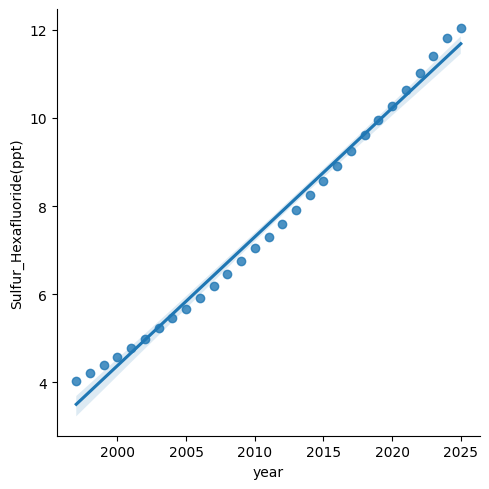

In [39]:
sf6_years = sf6_data['year'].unique()

sf6_anual = pd.DataFrame()

for i in sf6_years:
    df_avg = sf6_data[sf6_data['year'] == i]['average'].mean()
    df_new = (sf6_data[sf6_data['year'] == i].head(1))
    df_new['Sulfur_Hexafluoride(ppt)'] = df_avg
    sf6_anual = pd.concat([sf6_anual, df_new], ignore_index=True)

sns.lmplot(x='year',y='Sulfur_Hexafluoride(ppt)',data=sf6_anual)

In [40]:
import plotly.offline as py
import plotly.graph_objs as go
import datetime as dt

grp1 = co2_data.groupby(["year"]).mean()["average"]
trace1 = go.Bar(x=grp1.index, y=grp1.values)
layout = go.Layout(
    title="Average CO<sub>2</sub> Levels in Atmosphere per month",
    yaxis=dict(title="Parts per million (PPM)", range=(300,420)),
    xaxis=dict(title="Year"))
figure = go.Figure(data=[trace1], layout=layout)
py.iplot(figure, filename="co2-ppm-year")

In [41]:
grp2 = co2_data.groupby(["year", "month"]).mean()["average"]
x = [dt.datetime(year=i[0], month=i[1], day=15) for i in grp2.index]

y = grp2.values

track = go.Scatter(x=x,y=y,mode="markers", name="Actual value")

default_period = (dt.datetime(2015, 1, 1), dt.datetime(2025,12,1))

default_ppm_range = (395, 430)

layout=go.Layout(
    title='Sesonal fluctuation of CO<sub>2</sub>',
    yaxis=dict(title="Parts per million (PPM)",range=default_ppm_range),
    xaxis=dict(title="Year", range=default_period)
)

figure = go.Figure(data=[track] , layout=layout)
py.iplot(figure, filename="co2-ppm-seasonal")

In [42]:
import plotly.offline as py
import plotly.graph_objs as go
import datetime as dt

grp1 = ch4_data.groupby(["year"]).mean()["average"]
trace1 = go.Bar(x=grp1.index, y=grp1.values)
layout = go.Layout(
    title="Average CH<sub>4</sub> Levels in Atmosphere per month",
    yaxis=dict(title="Parts per million (PPM)", range=(1600,2000)),
    xaxis=dict(title="Year"))
figure = go.Figure(data=[trace1], layout=layout)
py.iplot(figure, filename="ch4-ppm-year")

In [43]:
grp2 = ch4_data.groupby(["year", "month"]).mean()["average"]
x = [dt.datetime(year=i[0], month=i[1], day=15) for i in grp2.index]

y = grp2.values

track = go.Scatter(x=x,y=y,mode="markers", name="Actual value")

default_period = (dt.datetime(2015, 1, 1), dt.datetime(2025,12,1))

default_ppm_range = (1800, 2000)

layout=go.Layout(
    title='Sesonal fluctuation of CH<sub>4</sub>',
    yaxis=dict(title="Parts per million (PPM)",range=default_ppm_range),
    xaxis=dict(title="Year", range=default_period)
)

figure = go.Figure(data=[track] , layout=layout)
py.iplot(figure, filename="ch4-ppm-seasonal")

In [44]:
import plotly.offline as py
import plotly.graph_objs as go
import datetime as dt

grp1 = n2o_data.groupby(["year"]).mean()["average"]
trace1 = go.Bar(x=grp1.index, y=grp1.values)
layout = go.Layout(
    title="Average N<sub>2</sub>O Levels in Atmosphere per month",
    yaxis=dict(title="Parts per million (PPM)", range=(300,350)),
    xaxis=dict(title="Year"))
figure = go.Figure(data=[trace1], layout=layout)
py.iplot(figure, filename="n2o-ppb-year")

In [45]:
grp2 = n2o_data.groupby(["year", "month"]).mean()["average"]
x = [dt.datetime(year=i[0], month=i[1], day=15) for i in grp2.index]

y = grp2.values

track = go.Scatter(x=x,y=y,mode="markers", name="Actual value")

default_period = (dt.datetime(2015, 1, 1), dt.datetime(2025,12,1))

default_ppm_range = (320, 350)

layout=go.Layout(
    title='Sesonal fluctuation of N<sub>2</sub>O',
    yaxis=dict(title="Parts per billion (PPB)",range=default_ppm_range),
    xaxis=dict(title="Year", range=default_period)
)

figure = go.Figure(data=[track] , layout=layout)
py.iplot(figure, filename="n2o-ppb-seasonal")

In [46]:
import plotly.offline as py
import plotly.graph_objs as go
import datetime as dt

grp1 = sf6_data.groupby(["year"]).mean()["average"]
trace1 = go.Bar(x=grp1.index, y=grp1.values)
layout = go.Layout(
    title="Average SF<sub>6</sub> Levels in Atmosphere per month",
    yaxis=dict(title="Parts per trillion (PPT)", range=(0,15)),
    xaxis=dict(title="Year"))
figure = go.Figure(data=[trace1], layout=layout)
py.iplot(figure, filename="sf6-ppt-year")

In [47]:
grp2 = co2_data.groupby(["year", "month"]).mean()["average"]
x = [dt.datetime(year=i[0], month=i[1], day=15) for i in grp2.index]

y = grp2.values

track = go.Scatter(x=x,y=y,mode="markers", name="Actual value")

default_period = (dt.datetime(2015, 1, 1), dt.datetime(2025,12,1))

default_ppm_range = (5, 15)

layout=go.Layout(
    title='Sesonal fluctuation of SF<sub>6</sub>',
    yaxis=dict(title="Parts per trillion (PPT)",range=default_ppm_range),
    xaxis=dict(title="Year", range=default_period)
)

figure = go.Figure(data=[track] , layout=layout)
py.iplot(figure, filename="sf6-ppt-seasonal")

In [48]:
from prophet import Prophet
from prophet.plot import plot_plotly


co2_data['date'] = pd.to_datetime(dict(year=co2_data['year'], month=co2_data['month'], day=1))
co2_data.set_index('date', inplace=True)
df_prophet = co2_data.reset_index()[['date', 'average']]
df_prophet.columns = ['ds', 'y']  # Prophet expects these names

model = Prophet(yearly_seasonality=True)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=(2100 - co2_data.index[-1].year)*12, freq='MS')  # monthly steps
forecast = model.predict(future)

fig = plot_plotly(model, forecast)
fig.update_layout(title="Interactive CO₂ Forecast (1979 to 2100)", yaxis_title="CO₂ ppm", xaxis_title="Year",showlegend=True )
fig.data[0].name = "Forecast"
fig.data[1].name = "Lower Bound"
fig.data[2].name = "Predicted"
fig.data[3].name = "Upper Bound"

fig.add_scatter(
    x=forecast['ds'], y=forecast['yhat_upper'],
    mode='lines',
    name='Upper Bound',
    line=dict(color='rgba(0,100,80,0.3)', dash='dot')
)

fig.add_scatter(
    x=forecast['ds'], y=forecast['yhat_lower'],
    mode='lines',
    name='Lower Bound',
    line=dict(color='rgba(255,100,100,0.3)', dash='dot')
)

py.init_notebook_mode(connected=True)
py.iplot(fig)

04:30:13 - cmdstanpy - INFO - Chain [1] start processing
04:30:14 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
from prophet import Prophet
from prophet.plot import plot_plotly


ch4_data['date'] = pd.to_datetime(dict(year=ch4_data['year'], month=ch4_data['month'], day=1))
ch4_data.set_index('date', inplace=True)
df_prophet = ch4_data.reset_index()[['date', 'average']]
df_prophet.columns = ['ds', 'y']  # Prophet expects these names

model = Prophet(yearly_seasonality=True)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=(2100 - ch4_data.index[-1].year)*12, freq='MS')  # monthly steps
forecast = model.predict(future)

fig = plot_plotly(model, forecast)
fig.update_layout(title="CH₄ Forecast (1979 to 2100)", yaxis_title="CH₄ ppm", xaxis_title="Year",showlegend=True )
fig.data[0].name = "Forecast"
fig.data[1].name = "Lower Bound"
fig.data[2].name = "Predicted"
fig.data[3].name = "Upper Bound"

fig.add_scatter(
    x=forecast['ds'], y=forecast['yhat_upper'],
    mode='lines',
    name='Upper Bound',
    line=dict(color='rgba(0,100,80,0.3)', dash='dot')
)

fig.add_scatter(
    x=forecast['ds'], y=forecast['yhat_lower'],
    mode='lines',
    name='Lower Bound',
    line=dict(color='rgba(255,100,100,0.3)', dash='dot')
)

py.init_notebook_mode(connected=True)
py.iplot(fig)

04:30:14 - cmdstanpy - INFO - Chain [1] start processing
04:30:14 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
from prophet import Prophet
from prophet.plot import plot_plotly


n2o_data['date'] = pd.to_datetime(dict(year=n2o_data['year'], month=n2o_data['month'], day=1))
n2o_data.set_index('date', inplace=True)
df_prophet = n2o_data.reset_index()[['date', 'average']]
df_prophet.columns = ['ds', 'y']  # Prophet expects these names

model = Prophet(yearly_seasonality=True)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=(2100 - n2o_data.index[-1].year)*12, freq='MS')  # monthly steps
forecast = model.predict(future)

fig = plot_plotly(model, forecast)
fig.update_layout(title="N₂O Forecast (1979 to 2100)", yaxis_title="N₂O ppm", xaxis_title="Year",showlegend=True )
fig.data[0].name = "Forecast"
fig.data[1].name = "Lower Bound"
fig.data[2].name = "Predicted"
fig.data[3].name = "Upper Bound"

fig.add_scatter(
    x=forecast['ds'], y=forecast['yhat_upper'],
    mode='lines',
    name='Upper Bound',
    line=dict(color='rgba(0,100,80,0.3)', dash='dot')
)

fig.add_scatter(
    x=forecast['ds'], y=forecast['yhat_lower'],
    mode='lines',
    name='Lower Bound',
    line=dict(color='rgba(255,100,100,0.3)', dash='dot')
)

py.init_notebook_mode(connected=True)
py.iplot(fig)

04:30:14 - cmdstanpy - INFO - Chain [1] start processing
04:30:15 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
from prophet import Prophet
from prophet.plot import plot_plotly


sf6_data['date'] = pd.to_datetime(dict(year=sf6_data['year'], month=sf6_data['month'], day=1))
sf6_data.set_index('date', inplace=True)
df_prophet = sf6_data.reset_index()[['date', 'average']]
df_prophet.columns = ['ds', 'y']  # Prophet expects these names

model = Prophet(yearly_seasonality=True)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=(2100 - sf6_data.index[-1].year)*12, freq='MS')  # monthly steps
forecast = model.predict(future)

fig = plot_plotly(model, forecast)
fig.update_layout(title="SF₆ Forecast (1979 to 2100)", yaxis_title="SF₆ ppm", xaxis_title="Year",showlegend=True )
fig.data[0].name = "Forecast"
fig.data[1].name = "Lower Bound"
fig.data[2].name = "Predicted"
fig.data[3].name = "Upper Bound"

fig.add_scatter(
    x=forecast['ds'], y=forecast['yhat_upper'],
    mode='lines',
    name='Upper Bound',
    line=dict(color='rgba(0,100,80,0.3)', dash='dot')
)

fig.add_scatter(
    x=forecast['ds'], y=forecast['yhat_lower'],
    mode='lines',
    name='Lower Bound',
    line=dict(color='rgba(255,100,100,0.3)', dash='dot')
)

py.init_notebook_mode(connected=True)
py.iplot(fig)

04:30:15 - cmdstanpy - INFO - Chain [1] start processing
04:30:15 - cmdstanpy - INFO - Chain [1] done processing
